In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:

In [3]:
type(data)

dict

In [4]:
print(data)

{'status': {'timestamp': '2024-02-08T14:41:23.641Z', 'error_code': 0, 'error_message': None, 'elapsed': 594, 'credit_count': 1, 'notice': None, 'total_count': 8862}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10816, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [35]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [10]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.962201e+07,1.962201e+07,False,NaN,1,NaN,NaN,None,2024-02-08T14:40:00.000Z,45012.445718,2.705833e+10,72.8396,0.519437,4.336200,5.932874,-3.644071,2.766491,21.377248,8.832348e+11,51.4759,9.452614e+11,None,2024-02-08T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 15:47:03.691574
1,1027,Ethereum,ETH,ethereum,8391,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201803e+08,1.201803e+08,True,NaN,2,NaN,NaN,None,2024-02-08T14:40:00.000Z,2425.664238,1.045864e+10,22.7106,0.269476,2.264243,5.744833,7.372733,3.399268,16.448075,2.915170e+11,16.9899,2.915170e+11,None,2024-02-08T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 15:47:03.691574
2,825,Tether USDt,USDT,tether,74388,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.618613e+10,9.960063e+10,True,NaN,3,NaN,NaN,None,2024-02-08T14:39:00.000Z,0.999785,4.281638e+10,41.8843,0.024646,0.013602,0.026679,-0.045204,-0.032404,-0.056603,9.616548e+10,5.6046,9.957924e+10,None,2024-02-08T14:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-08 15:47:03.691574
3,1839,BNB,BNB,bnb,2056,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495458e+08,1.495458e+08,False,NaN,4,NaN,NaN,None,2024-02-08T14:39:00.000Z,318.105002,1.118791e+09,60.2260,0.290741,4.776778,5.916612,5.625742,32.572724,27.328507,4.757128e+10,2.7725,4.757128e+10,None,2024-02-08T14:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 15:47:03.691574
4,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.368688e+08,5.690430e+08,True,NaN,5,NaN,NaN,None,2024-02-08T14:40:00.000Z,104.125848,2.517347e+09,88.3355,2.120048,8.875887,7.474557,3.644576,42.348038,108.700796,4.548933e+10,2.6512,5.925209e+10,None,2024-02-08T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 15:47:03.691574
5,52,XRP,XRP,xrp,1226,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.443619e+10,9.998794e+10,False,NaN,6,NaN,NaN,None,2024-02-08T14:40:00.000Z,0.515872,9.384645e+08,12.8437,0.681056,2.570744,3.292484,-8.016349,-21.641742,-20.190790,2.808210e+10,1.6367,5.158718e+10,None,2024-02-08T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 15:47:03.691574
6,3408,USDC,USDC,usd-coin,16627,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.753191e+10,2.753191e+10,False,NaN,7,NaN,NaN,None,2024-02-08T14:40:00.000Z,0.999732,6.352359e+09,35.6522,-0.013157,-0.043167,-0.042784,-0.034667,-0.033295,-0.038119,2.752452e+10,1.6033,2.752452e+10,None,2024-02-08T14:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-08 15:47:03.691574
7,2010,Cardano,ADA,cardano,1067,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.543863e+10,3.659974e+10,False,NaN,8,NaN,NaN,None,2024-02-08T14:39:00.000Z,0.530828,6.658212e+08,60.0587,1.248008,10.288261,7.726856,3.182073,-10.107100,45.380123,1.881183e+10,1.0964,2.388728e+10,None,2024-02-08T14:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 15:47:03.691574
8,5805,Avalanche,AVAX,avalanche,660,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+0

In [14]:
df['date_added']

0     2010-07-13T00:00:00.000Z
1     2015-08-07T00:00:00.000Z
2     2015-02-25T00:00:00.000Z
3     2017-07-25T00:00:00.000Z
4     2020-04-10T00:00:00.000Z
5     2013-08-04T00:00:00.000Z
6     2018-10-08T00:00:00.000Z
7     2017-10-01T00:00:00.000Z
8     2020-07-13T00:00:00.000Z
9     2013-12-15T00:00:00.000Z
10    2017-09-20T00:00:00.000Z
11    2017-09-13T00:00:00.000Z
12    2020-08-19T00:00:00.000Z
13    2019-04-28T00:00:00.000Z
14    2021-08-26T13:40:22.000Z
Name: date_added, dtype: object

In [38]:
def api_runner():
    
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r"C:\Users\FashN\OneDrive\Desktop\CODES\DATA-ANALYSIS\data_analysis\Pandas\auto run\crypto_api.csv"):
        df.to_csv(r'C:\Users\FashN\OneDrive\Desktop\CODES\DATA-ANALYSIS\data_analysis\Pandas\auto run\crypto_api.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\FashN\OneDrive\Desktop\CODES\DATA-ANALYSIS\data_analysis\Pandas\auto run\crypto_api.csv', mode='a', header=False)


In [39]:
import os
from time import time, sleep

for i in range(333):
    api_runner()
    print(f'API runner no {i} completed successfully')
    sleep(6)
exit()

API runner no 0 completed successfully
API runner no 1 completed successfully
API runner no 2 completed successfully


KeyboardInterrupt: 

In [45]:
df_read = pd.read_csv(r'C:\Users\FashN\OneDrive\Desktop\CODES\DATA-ANALYSIS\data_analysis\Pandas\auto run\crypto_api.csv')

In [46]:
df_read

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.962201e+07,1.962201e+07,False,NaN,1,NaN,NaN,NaN,2024-02-08T15:12:00.000Z,44980.797120,2.697900e+10,68.1391,-0.337378,4.719514,5.244053,-3.458536,2.577605,21.044637,8.826137e+11,51.3242,9.445967e+11,NaN,2024-02-08T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 16:13:15.133203
1,1,1027,Ethereum,ETH,ethereum,8391,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201803e+08,1.201803e+08,True,NaN,2,NaN,NaN,NaN,2024-02-08T15:12:00.000Z,2432.151401,1.043094e+10,20.9016,-0.044232,2.936882,5.509305,7.742816,3.648483,16.484400,2.922966e+11,16.9971,2.922966e+11,NaN,2024-02-08T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 16:13:15.133203
2,2,825,Tether USDt,USDT,tether,74388,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.618613e+10,9.960063e+10,True,NaN,3,NaN,NaN,NaN,2024-02-08T15:11:00.000Z,0.999755,4.280445e+10,39.6526,0.008564,0.013113,0.011915,-0.065373,-0.029074,-0.095202,9.616259e+10,5.5840,9.957625e+10,NaN,2024-02-08T15:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-08 16:13:15.133203
3,3,1839,BNB,BNB,bnb,2056,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495458e+08,1.495458e+08,False,NaN,4,NaN,NaN,NaN,2024-02-08T15:11:00.000Z,318.761697,1.124665e+09,59.0460,0.323844,5.225485,5.771623,6.583329,32.371780,27.629206,4.766949e+10,2.7681,4.766949e+10,NaN,2024-02-08T15:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 16:13:15.133203
4,4,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.368688e+08,5.690430e+08,True,NaN,5,NaN,NaN,NaN,2024-02-08T15:12:00.000Z,104.263710,2.540271e+09,87.9562,0.101360,9.315799,7.277627,4.956349,40.783522,103.950556,4.554956e+10,2.6487,5.933054e+10,NaN,2024-02-08T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 16:13:15.133203
5,5,52,XRP,XRP,xrp,1226,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.443619e+10,9.998794e+10,False,NaN,6,NaN,NaN,NaN,2024-02-08T15:12:00.000Z,0.514901,9.476061e+08,13.6700,-0.228361,2.643138,2.588641,-7.897819,-22.111214,-20.356514,2.802927e+10,1.6299,5.149013e+10,NaN,2024-02-08T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 16:13:15.133203
6,6,3408,USDC,USDC,usd-coin,16628,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.753191e+10,2.753191e+10,False,NaN,7,NaN,NaN,NaN,2024-02-08T15:12:00.000Z,0.999982,6.316865e+09,31.7937,0.010566,-0.002879,-0.046632,-0.025717,-0.021768,-0.023282,2.753141e+10,1.6001,2.753141e+10,NaN,2024-02-08T15:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-08 16:13:15.133203
7,7,2010,Cardano,ADA,cardano,1067,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.543863e+10,3.659974e+10,False,NaN,8,NaN,NaN,NaN,2024-02-08T15:11:00.000Z,0.531526,6.681958e+08,59.1589,0.230988,10.720064,7.096932,4.498676,-10.788237,44.992717,1.883657e+10,1.0938,2.391869e+10,NaN,2024-02-08T15:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 16:13:15.133203
8,8,5805,Avalanche,AVAX,avalanche,660,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi.

In [50]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [51]:
df_read

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19622012.00000,19622012.00000,False,NaN,1,NaN,NaN,NaN,2024-02-08T15:12:00.000Z,44980.79712,26979001006.63299,68.13910,-0.33738,4.71951,5.24405,-3.45854,2.57760,21.04464,882613740859.26379,51.32420,944596739521.13000,NaN,2024-02-08T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 16:13:15.133203
1,1,1027,Ethereum,ETH,ethereum,8391,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120180272.95157,120180272.95157,True,NaN,2,NaN,NaN,NaN,2024-02-08T15:12:00.000Z,2432.15140,10430939585.55144,20.90160,-0.04423,2.93688,5.50930,7.74282,3.64848,16.48440,292296619231.21680,16.99710,292296619231.21997,NaN,2024-02-08T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 16:13:15.133203
2,2,825,Tether USDt,USDT,tether,74388,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,96186132537.35936,99600626149.74509,True,NaN,3,NaN,NaN,NaN,2024-02-08T15:11:00.000Z,0.99976,42804452833.44041,39.65260,0.00856,0.01311,0.01192,-0.06537,-0.02907,-0.09520,96162590176.15063,5.58400,99576248062.64000,NaN,2024-02-08T15:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-08 16:13:15.133203
3,3,1839,BNB,BNB,bnb,2056,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149545847.55866,149545847.55866,False,NaN,4,NaN,NaN,NaN,2024-02-08T15:11:00.000Z,318.76170,1124665446.24203,59.04600,0.32384,5.22549,5.77162,6.58333,32.37178,27.62921,47669488159.02909,2.76810,47669488159.03000,NaN,2024-02-08T15:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 16:13:15.133203
4,4,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,436868796.11860,569043047.71515,True,NaN,5,NaN,NaN,NaN,2024-02-08T15:12:00.000Z,104.26371,2540271252.24949,87.95620,0.10136,9.31580,7.27763,4.95635,40.78352,103.95056,45549561316.04952,2.64870,59330539108.44000,NaN,2024-02-08T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 16:13:15.133203
5,5,52,XRP,XRP,xrp,1226,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54436190886.00000,99987935982.00000,False,NaN,6,NaN,NaN,NaN,2024-02-08T15:12:00.000Z,0.51490,947606127.93507,13.67000,-0.22836,2.64314,2.58864,-7.89782,-22.11121,-20.35651,28029266302.23212,1.62990,51490131557.76000,NaN,2024-02-08T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-08 16:13:15.133203
6,6,3408,USDC,USDC,usd-coin,16628,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,27531910576.53332,27531910576.53332,False,NaN,7,NaN,NaN,NaN,2024-02-08T15:12:00.000Z,0.99998,6316864565.18011,31.79370,0.01057,-0.00288,-0.04663,-0.02572,-0.02177,-0.02328,27531406082.75626,1.60010,27531406082.76000,NaN,2024-02-08T15:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-08 16:13:15.133203
7,7,2010,Cardano,ADA,cardano,1067,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35438628837.10800,36599737145.58500,False,NaN,8,NaN,NaN,NaN,2024-02-08T15:11:00.000Z,0.53153,668195789.46038,59.15890,0.23099,10.72006,7.09693,4.49868,-10.78824,44.99272,18836568729.65385,1.09380,23918690441.74000,NaN,2024-02-08T15:11:00.000

In [53]:
df3 = df_read.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d']].mean()

In [54]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h    -0.33738
             quote.USD.percent_change_24h    4.71951
             quote.USD.percent_change_7d     5.24405
             quote.USD.percent_change_30d   -3.45854
Ethereum     quote.USD.percent_change_1h    -0.04423
             quote.USD.percent_change_24h    2.93688
             quote.USD.percent_change_7d     5.50930
             quote.USD.percent_change_30d    7.74282
Tether USDt  quote.USD.percent_change_1h     0.00856
             quote.USD.percent_change_24h    0.01311
             quote.USD.percent_change_7d     0.01192
             quote.USD.percent_change_30d   -0.06537
BNB          quote.USD.percent_change_1h     0.32384
             quote.USD.percent_change_24h    5.22549
             quote.USD.percent_change_7d     5.77162
             quote.USD.percent_change_30d    6.58333
Solana       quote.USD.percent_change_1h     0.10136
             quote.USD.percent_change_24h    9.31580
    

In [55]:
print(type(df3))
print(type(df4))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [56]:
# changing df4 to a dataframe
df5=df4.to_frame(name='values')
df5

values
name                                             
Bitcoin     quote.USD.percent_change_1h  -0.33738
            quote.USD.percent_change_24h  4.71951
            quote.USD.percent_change_7d   5.24405
            quote.USD.percent_change_30d -3.45854
Ethereum    quote.USD.percent_change_1h  -0.04423
            quote.USD.percent_change_24h  2.93688
            quote.USD.percent_change_7d   5.50930
            quote.USD.percent_change_30d  7.74282
Tether USDt quote.USD.percent_change_1h   0.00856
            quote.USD.percent_change_24h  0.01311
            quote.USD.percent_change_7d   0.01192
            quote.USD.percent_change_30d -0.06537
BNB         quote.USD.percent_change_1h   0.32384
            quote.USD.percent_change_24h  5.22549
            quote.USD.percent_change_7d   5.77162
            quote.USD.percent_change_30d  6.58333
Solana      quote.USD.percent_change_1h   0.10136
            quote.USD.percent_change_24h  9.31580
            quote.USD.percent_change_7d   7.27763
            quote.USD.percent_change_30d  4.95635
XRP         quote.USD.percent_change_1h  -0.22836
            quote.USD.percent_change_24h  2.64314
            quote.USD.percent_change_7d   2.58864
            quote.USD.percent_change_30d -7.89782
USDC        quote.USD.percent_change_1h   0.01057
            quote.USD.percent_change_24h -0.00288
            quote.USD.percent_change_7d  -0.04663
            quote.USD.percent_change_30d -0.02572
Cardano     quote.USD.percent_change_1h   0.23099
            quote.USD.percent_change_24h 10.72006
            quote.USD.percent_change_7d   7.09693
            quote.USD.percent_change_30d  4.49868
Avalanche   quote.USD.percent_change_1h   0.29224
            quote.USD.percent_change_24h  4.92889
            quote.USD.percent_change_7d   6.38017
            quote.USD.percent_change_30d  1.40251
Dogecoin    quote.USD.percent_change_1h   0.12800
            quote.USD.percent_change_24h  2.28044
            quote.USD.percent_change_7d   1.57606
            quote.USD.percent_change_30d  3.69814

In [63]:
print(type(df4))
df5.count()

<class 'pandas.core.series.Series'>


values    40
dtype: int64

In [82]:
# giving it an index
length = len(df5)
index = pd.Index(range(length))
df6 = df5.reset_index()

In [83]:
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.33738
1,Bitcoin,quote.USD.percent_change_24h,4.71951
2,Bitcoin,quote.USD.percent_change_7d,5.24405
3,Bitcoin,quote.USD.percent_change_30d,-3.45854
4,Ethereum,quote.USD.percent_change_1h,-0.04423
5,Ethereum,quote.USD.percent_change_24h,2.93688
6,Ethereum,quote.USD.percent_change_7d,5.50930
7,Ethereum,quote.USD.percent_change_30d,7.74282
8,Tether USDt,quote.USD.percent_change_1h,0.00856
9,Tether USDt,quote.USD.percent_change_24h,0.01311


In [87]:
df7 = df6.rename(columns={'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.33738
1,Bitcoin,quote.USD.percent_change_24h,4.71951
2,Bitcoin,quote.USD.percent_change_7d,5.24405
3,Bitcoin,quote.USD.percent_change_30d,-3.45854
4,Ethereum,quote.USD.percent_change_1h,-0.04423
5,Ethereum,quote.USD.percent_change_24h,2.93688
6,Ethereum,quote.USD.percent_change_7d,5.50930
7,Ethereum,quote.USD.percent_change_30d,7.74282
8,Tether USDt,quote.USD.percent_change_1h,0.00856
9,Tether USDt,quote.USD.percent_change_24h,0.01311


In [88]:
import seaborn as sns
import matplotlib as plt

C:\Users\FashN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


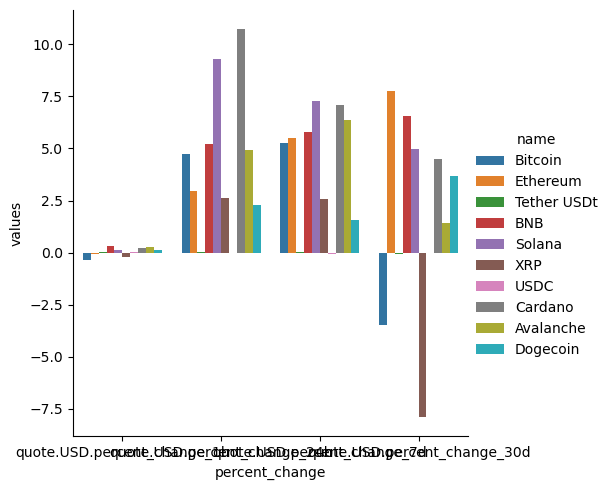

In [107]:
sns.catplot(x='percent_change', y='values', hue = 'name', data = df7, kind='bar')

In [111]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_1h'], ['24hours', '7days', '30days' ,'1hour'])

In [112]:
df7

,name,percent_change,values
0,Bitcoin,1hour,-0.33738
1,Bitcoin,24hours,4.71951
2,Bitcoin,7days,5.24405
3,Bitcoin,30days,-3.45854
4,Ethereum,1hour,-0.04423
5,Ethereum,24hours,2.93688
6,Ethereum,7days,5.50930
7,Ethereum,30days,7.74282
8,Tether USDt,1hour,0.00856
9,Tether USDt,24hours,0.01311


C:\Users\FashN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


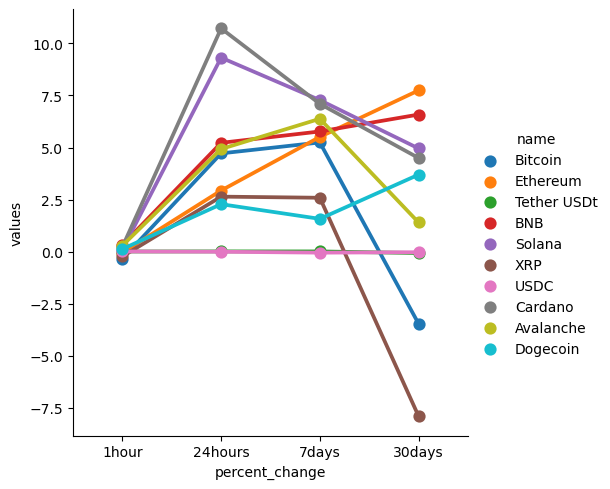

In [113]:
sns.catplot(x='percent_change', y='values', hue = 'name', data = df7, kind='point')

In [127]:
df8 = df_read[['name', 'quote.USD.price', 'timestamp']]
df8.query("name == 'Bitcoin'")


,name,quote.USD.price,timestamp
0,Bitcoin,44980.79712,2024-02-08 16:13:15.133203
10,Bitcoin,44980.79712,2024-02-08 16:13:22.945045
20,Bitcoin,44980.79712,2024-02-08 16:13:33.151303


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

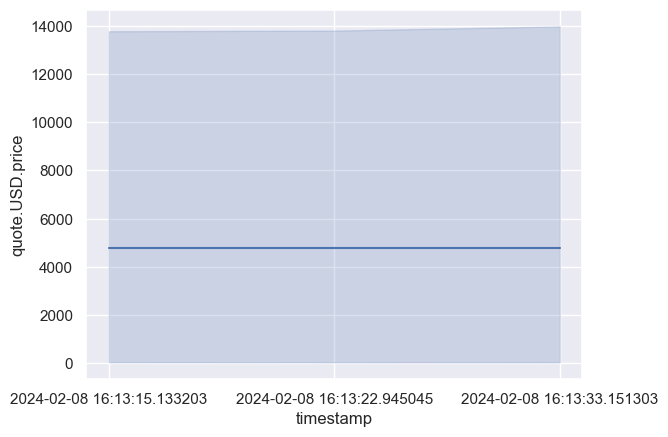

In [131]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)